## load subjects list

In [2]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
#good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# good_subjects_list.remove('NDARRM073JKA')#xcp straggler


# with open('good_pilots_ru_dm_list.txt', 'r') as file:
#     sub_list = file.readlines()
# good_subjects_list = [line.strip() for line in sub_list]

# good_subjects_list

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# sub='NDARRM073JKA'
# %run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r --skip_existing

In [5]:
for sub in good_subjects_list:
#     #print(f'SUB-{sub} NO V1******************')
#     %run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r
#     #print(f'SUB-{sub} WITH V1****************++++++')
#     #%run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r -v
    # %run pilot.py -s $sub -p MT -f motion_pca5 -d 0 -r
    %run pilot.py -s $sub -p MT -f motion_pca5 -d 0 -a

#     print(f'****************++++++****************++++++****************++++++*************')

# #python pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


running subject NDARWW005GCU
loaded brain data
run lassocv
No value was passed to args.bootstrap
X: (750, 5)
Y: (750, 100)
X: (730, 5)
Y: (730, 100)
59.17052721977234
saving results
MEAN test R^2 Score:  -0.02
MEAN train R^2 Score:  0.06
running subject NDARLA226ADX
loaded brain data
run lassocv
No value was passed to args.bootstrap
X: (750, 5)
Y: (750, 100)
X: (730, 5)
Y: (730, 100)
79.16477370262146
saving results
MEAN test R^2 Score:  -0.03
MEAN train R^2 Score:  0.06
running subject NDARYL124VM6
loaded brain data
run lassocv
No value was passed to args.bootstrap
X: (750, 5)
Y: (750, 100)
X: (730, 5)
Y: (730, 100)
84.12608551979065
saving results
MEAN test R^2 Score:  -0.02
MEAN train R^2 Score:  0.05
running subject NDAREM731BYM
loaded brain data
run lassocv
No value was passed to args.bootstrap
X: (750, 5)
Y: (750, 100)
X: (730, 5)
Y: (730, 100)
77.18458914756775
saving results
MEAN test R^2 Score:  -0.01
MEAN train R^2 Score:  0.03
running subject NDARHJ830RXD
loaded brain data
r

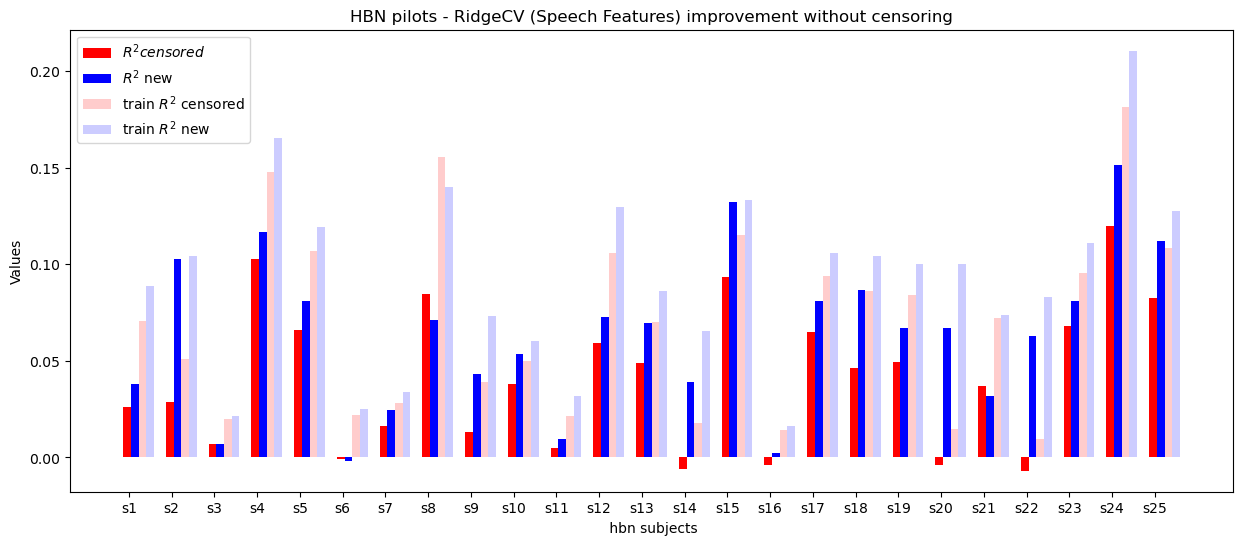

/tmp/ipykernel_1714280/2467218437.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new'])


[Text(0, 0, '$R^2 censored$'),
 Text(1, 0, '$R^2$ new'),
 Text(2, 0, 'train $R^2$ censored'),
 Text(3, 0, 'train $R^2$ new')]

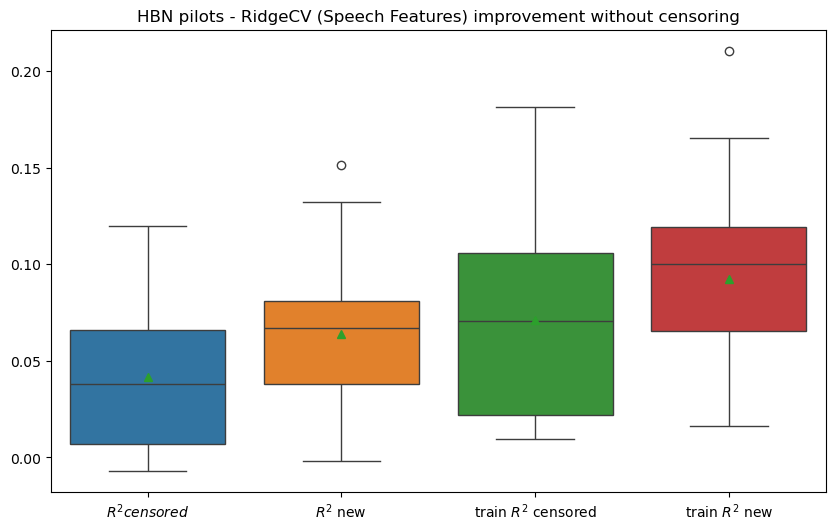

In [29]:
r2_censored=[]
r2_new=[]
r2_censored_train=[]
r2_new_train=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2_censored.append(np.mean(loaded['stacked_r2s']))
    r2_censored_train.append(np.mean(loaded['train_r2_list']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2_new.append(np.mean(loaded['stacked_r2s']))
    r2_new_train.append(np.mean(loaded['train_r2_list']))


title='HBN pilots - RidgeCV (Speech Features) improvement without censoring'

# Number of groups
N = len(r2_censored)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[r2_censored,r2_new,r2_censored_train,r2_new_train]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new']
# Create bars for each list
alphas=[1,1,0.2,0.2]
colors=['r','b','red','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new'])

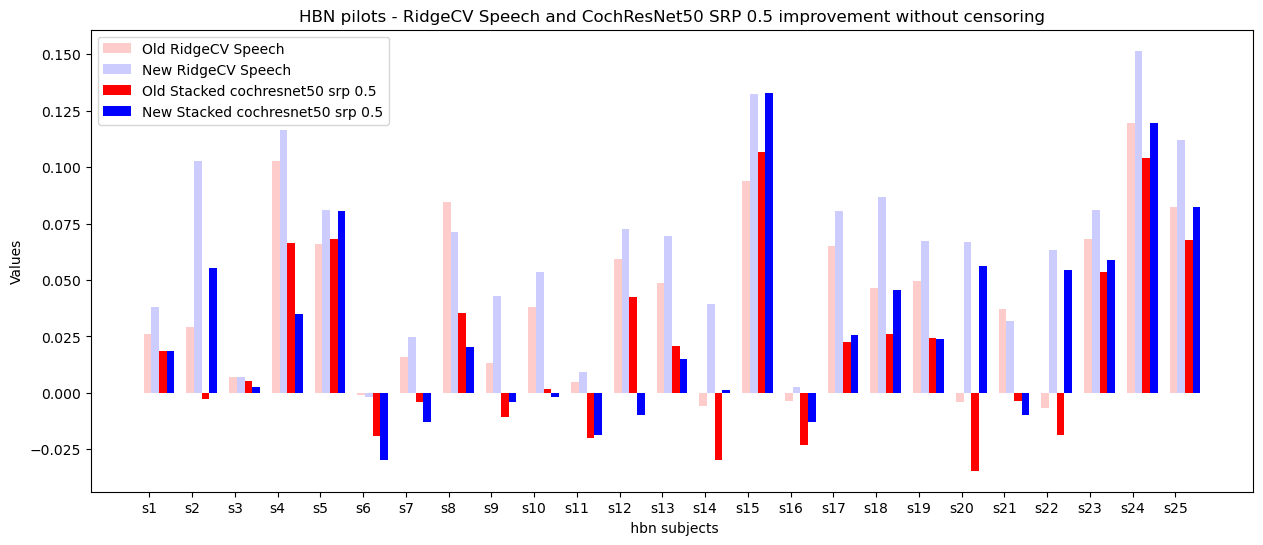

/tmp/ipykernel_1714280/3479339438.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'Old RidgeCV Speech'),
 Text(1, 0, 'New RidgeCV Speech'),
 Text(2, 0, 'Old Stacked cochresnet50 srp 0.5'),
 Text(3, 0, 'New Stacked cochresnet50 srp 0.5')]

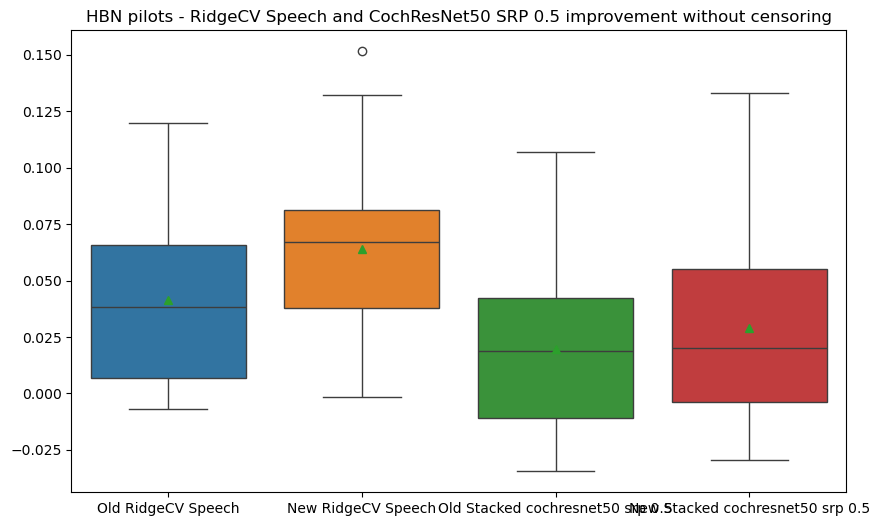

In [32]:
r2_old=[]
r2_new=[]
ridgeCV_old=[]
ridgeCV_new=[]

v='manualhrf_srp05'
v='cochresnet50srp05hrfssfirst'
for sub in good_subjects_list:
    # loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_censored.append(np.mean(loaded['stacked_r2s']))
    try:
        dataload=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-{v}_delay-0.npz')
        r2_old.append(np.mean(dataload['stacked_r2s'],axis=0))
        dataload=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-{v}_delay-0.npz')
        r2_new.append(np.mean(dataload['stacked_r2s'],axis=0))



        loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
        ridgeCV_old.append(np.mean(loaded['stacked_r2s']))
        # r2_censored_train.append(np.mean(loaded['train_r2_list']))
        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
        ridgeCV_new.append(np.mean(loaded['stacked_r2s']))
        #r2_new_train.append(np.mean(loaded['train_r2_list']))
    
    except:
        print(f'skip{sub}')


    
    # r2_censored_train.append(np.mean(loaded['train_r2_list']))
    # loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_new.append(np.mean(loaded['stacked_r2s']))
    # r2_new_train.append(np.mean(loaded['train_r2_list']))




# Number of groups
N = len(r2_censored)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
#data=[r2_censored,r2_new,r2_censored_train,r2_new_train]
data=[ridgeCV_old,ridgeCV_new,r2_old,r2_new,]

# r2_old=[]
# r2_new=[]
# ridgeCV_old=[]
# ridgeCV_new=[]
# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['Old RidgeCV Speech','New RidgeCV Speech','Old Stacked cochresnet50 srp 0.5','New Stacked cochresnet50 srp 0.5']
# Create bars for each list
alphas=[0.2,0.2,1,1]
colors=['r','b','red','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

title='HBN pilots - RidgeCV Speech and CochResNet50 SRP 0.5 improvement without censoring'
# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)

## take a look at the results for librosa lowlevel + yamnet high level vs cochresnet50

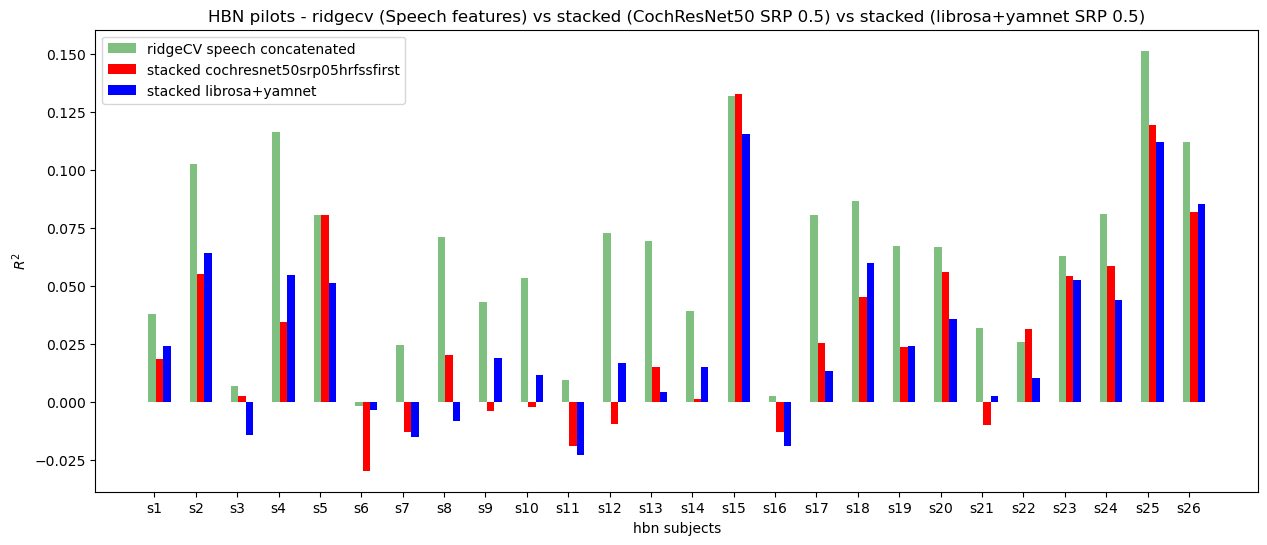

/tmp/ipykernel_2573530/2840288625.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'ridgeCV speech concatenated'),
 Text(1, 0, 'stacked cochresnet50srp05hrfssfirst'),
 Text(2, 0, 'stacked librosa+yamnet')]

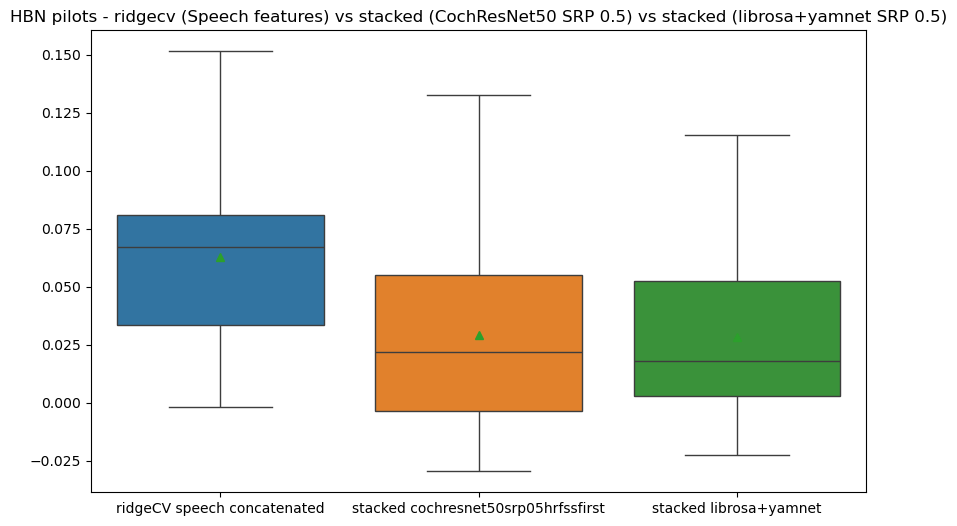

In [17]:
# r2_old=[]
r2_ridgeCV_speech=[]
r2_crn50=[]
r2_manual=[]

v2='manualhrf_srp05'
v1='cochresnet50srp05hrfssfirst'
for sub in good_subjects_list:
    # loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_censored.append(np.mean(loaded['stacked_r2s']))
    try:
        # dataload=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-{v}_delay-0.npz')
        # r2_old.append(np.mean(dataload['stacked_r2s'],axis=0))
        dataload=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-{v1}_delay-0.npz')
        r2_crn50.append(np.mean(dataload['stacked_r2s'],axis=0))



        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
        r2_ridgeCV_speech.append(np.mean(loaded['stacked_r2s']))
        # r2_censored_train.append(np.mean(loaded['train_r2_list']))
        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-{v2}_delay-0.npz')
        r2_manual.append(np.mean(loaded['stacked_r2s']))
        #r2_new_train.append(np.mean(loaded['train_r2_list']))
    
    except:
        print(f'skip{sub}')


    
    # r2_censored_train.append(np.mean(loaded['train_r2_list']))
    # loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_new.append(np.mean(loaded['stacked_r2s']))
    # r2_new_train.append(np.mean(loaded['train_r2_list']))




# Number of groups
N = len(r2_crn50)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
#data=[r2_censored,r2_new,r2_censored_train,r2_new_train]
data=[r2_ridgeCV_speech,r2_crn50,r2_manual]

# r2_old=[]
# r2_new=[]
# ridgeCV_old=[]
# ridgeCV_new=[]
# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['ridgeCV speech concatenated','stacked cochresnet50srp05hrfssfirst','stacked librosa+yamnet']
# Create bars for each list
alphas=[0.5,1,1]
colors=['g','r','b','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

title='HBN pilots - ridgecv (Speech features) vs stacked (CochResNet50 SRP 0.5) vs stacked (librosa+yamnet SRP 0.5)'
# Add labels, title, and legend
ax.set_xlabel('hbn subjects')
ax.set_ylabel('$R^2$')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)

## look at just the good subjects now

In [34]:
# with open('pilots_ru_dm_list.txt', 'r') as file:
#     sub_list = file.readlines()
# good_subjects_list = [line.strip() for line in sub_list]
# good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# # good_subjects_list.remove('NDARRM073JKA')#xcp straggler


with open('good_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

# good_subjects_list

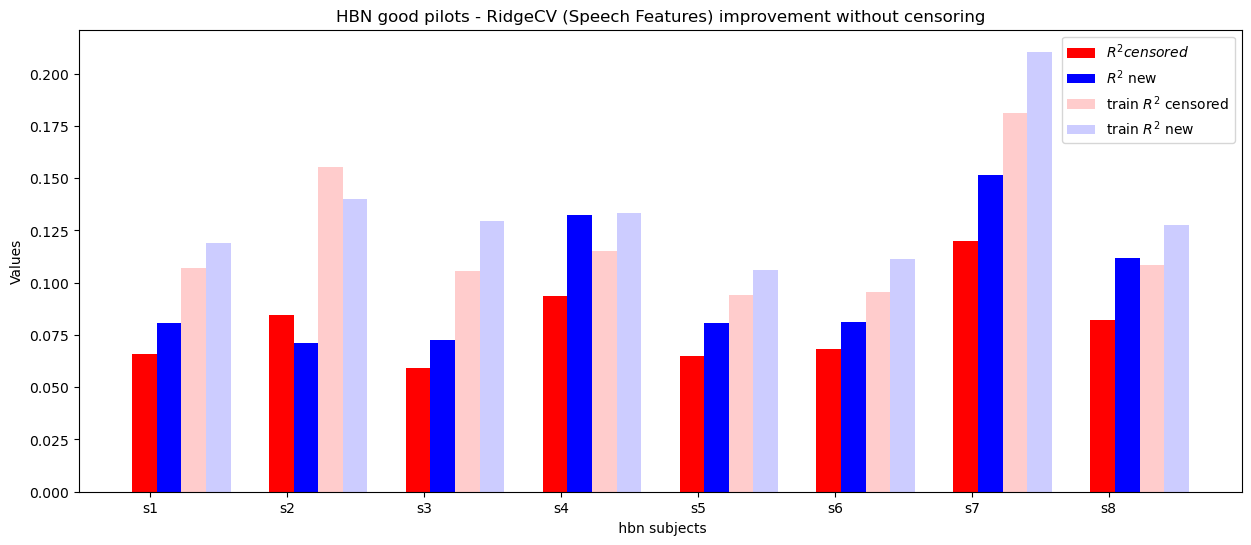

/tmp/ipykernel_1714280/2235740539.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new'])


[Text(0, 0, '$R^2 censored$'),
 Text(1, 0, '$R^2$ new'),
 Text(2, 0, 'train $R^2$ censored'),
 Text(3, 0, 'train $R^2$ new')]

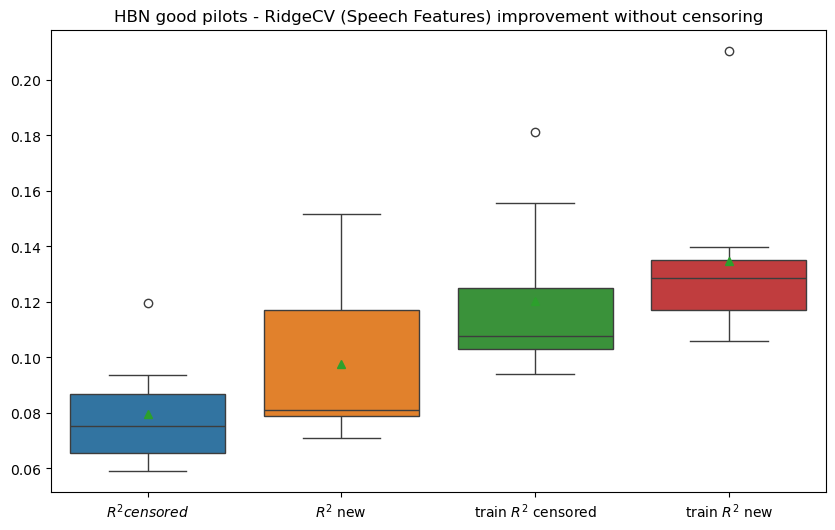

In [35]:
r2_censored=[]
r2_new=[]
r2_censored_train=[]
r2_new_train=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2_censored.append(np.mean(loaded['stacked_r2s']))
    r2_censored_train.append(np.mean(loaded['train_r2_list']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2_new.append(np.mean(loaded['stacked_r2s']))
    r2_new_train.append(np.mean(loaded['train_r2_list']))


title='HBN good pilots - RidgeCV (Speech Features) improvement without censoring'

# Number of groups
N = len(r2_censored)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[r2_censored,r2_new,r2_censored_train,r2_new_train]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new']
# Create bars for each list
alphas=[1,1,0.2,0.2]
colors=['r','b','red','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(['$R^2 censored$','$R^2$ new','train $R^2$ censored','train $R^2$ new'])

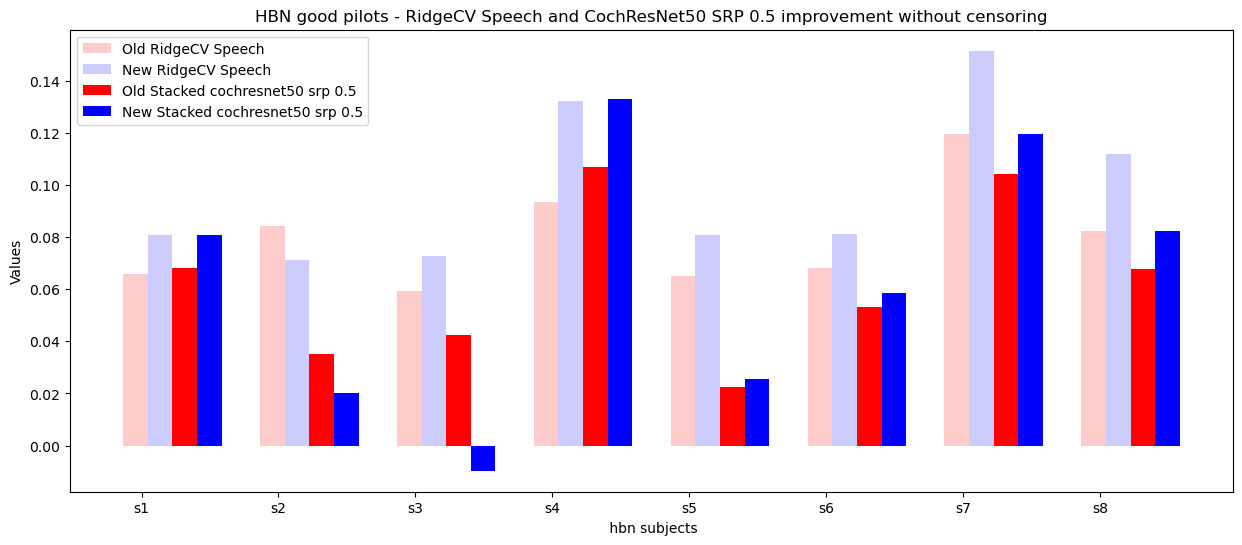

/tmp/ipykernel_1714280/30790356.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'Old RidgeCV Speech'),
 Text(1, 0, 'New RidgeCV Speech'),
 Text(2, 0, 'Old Stacked cochresnet50 srp 0.5'),
 Text(3, 0, 'New Stacked cochresnet50 srp 0.5')]

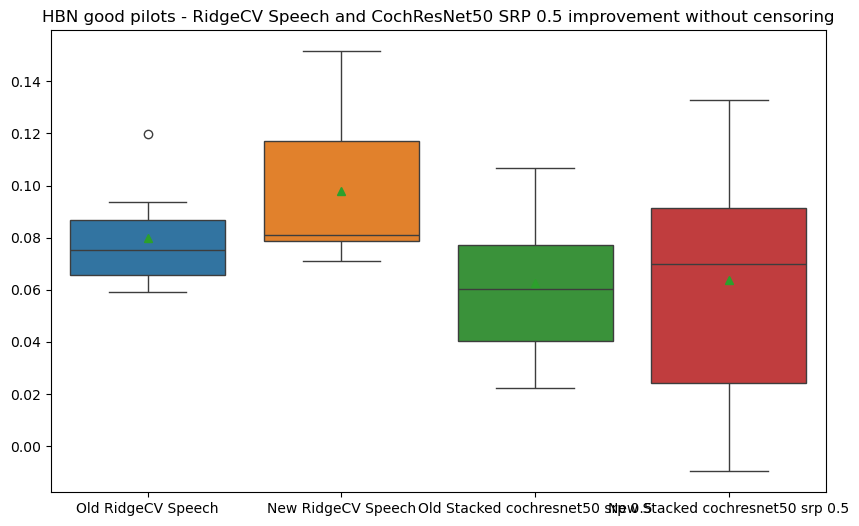

In [36]:
r2_old=[]
r2_new=[]
ridgeCV_old=[]
ridgeCV_new=[]

v='manualhrf_srp05'
v='cochresnet50srp05hrfssfirst'
for sub in good_subjects_list:
    # loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_censored.append(np.mean(loaded['stacked_r2s']))
    try:
        dataload=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-{v}_delay-0.npz')
        r2_old.append(np.mean(dataload['stacked_r2s'],axis=0))
        dataload=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-{v}_delay-0.npz')
        r2_new.append(np.mean(dataload['stacked_r2s'],axis=0))



        loaded=np.load(f'../good_pilots/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
        ridgeCV_old.append(np.mean(loaded['stacked_r2s']))
        # r2_censored_train.append(np.mean(loaded['train_r2_list']))
        loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
        ridgeCV_new.append(np.mean(loaded['stacked_r2s']))
        #r2_new_train.append(np.mean(loaded['train_r2_list']))
    
    except:
        print(f'skip{sub}')


    
    # r2_censored_train.append(np.mean(loaded['train_r2_list']))
    # loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # r2_new.append(np.mean(loaded['stacked_r2s']))
    # r2_new_train.append(np.mean(loaded['train_r2_list']))




# Number of groups
N = len(r2_censored)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
#data=[r2_censored,r2_new,r2_censored_train,r2_new_train]
data=[ridgeCV_old,ridgeCV_new,r2_old,r2_new,]

# r2_old=[]
# r2_new=[]
# ridgeCV_old=[]
# ridgeCV_new=[]
# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['Old RidgeCV Speech','New RidgeCV Speech','Old Stacked cochresnet50 srp 0.5','New Stacked cochresnet50 srp 0.5']
# Create bars for each list
alphas=[0.2,0.2,1,1]
colors=['r','b','red','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}', alpha=alphas[i],color=colors[i])

title='HBN good pilots - RidgeCV Speech and CochResNet50 SRP 0.5 improvement without censoring'
# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title(title)
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(title)
ax.set_xticklabels(labels)

## compare stacked results

cochresnet50srp05hrfssfirst
(728,)
(728,)
(728,)
(728,)
(728,)
(728,)
(728,)
(728,)
manualhrf_srp05
(728,)
(728,)
(728,)
(728,)
(728,)
(728,)
(728,)
(728,)
cochresnet50srp05hrfssfirst
manualhrf_srp05


/tmp/ipykernel_1714280/1809577641.py:57: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax=sns.violinplot(data=plot_data,palette=palette_14)


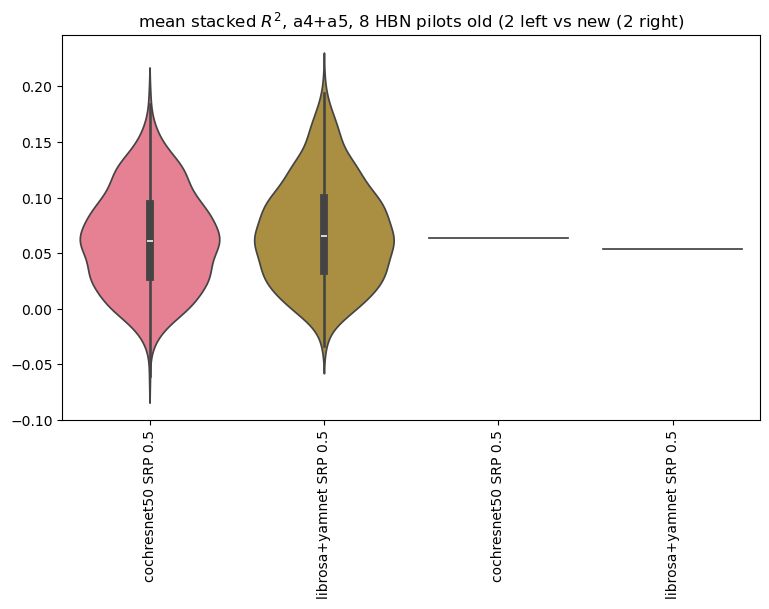

/tmp/ipykernel_1714280/1809577641.py:70: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax=sns.boxplot(data=plot_data,showmeans=True,palette=palette_14)


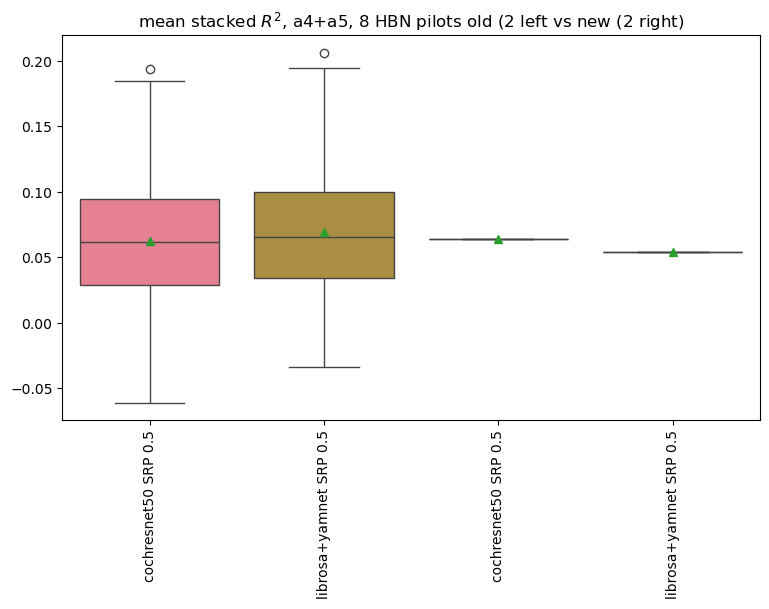

In [47]:
# THE LOOPS DON"T SEEM CORRECT HERE _ REDO IT!



import numpy as np
#same plot but the mean per grayprdinate across subjects


#hrf_feats=['manualhrf','manualhrfpca1','manualhrfpca10','cochresnet50pca1hrfssfirst','cochresnet50pca20hrfssfirst']
# good_subjects_list

plot_data=[]
plot_data_labels=[]

#hrf_feats=['cochresnet50pca1hrfssfirst','cochresnet50pca10hrfssfirst','cochresnet50pca100hrfssfirst','cochresnet50srp05hrfssfirst','manualhrf_srp05','manualhrf_srp01']
#hrf_feats_names=['cochresnet50 PCA 1','cochresnet50 PCA 10','cochresnet50 PCA 100','cochresnet50 SRP 0.5','librosa+yamnet SRP 0.5','librosa+yamnet SRP 0.1']
hrf_feats=['cochresnet50srp05hrfssfirst','manualhrf_srp05']
hrf_feats_names=['cochresnet50 SRP 0.5','librosa+yamnet SRP 0.5']

for i,v in enumerate(hrf_feats):
    print(v)
    feat_data=[]
    for s in good_subjects_list:
        try:
            dataload=np.load(f'../good_pilots/sub-{s}_roi-a4a5_feat-{v}_delay-0.npz')
            feat_data.append(dataload['stacked_r2s'])
            print(dataload['stacked_r2s'].shape)
        except:
            print(f'skip{s}\n')
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0)  )
    plot_data_labels.append(hrf_feats_names[i])

for i,v in enumerate(hrf_feats):
    print(v)
    feat_data=[]
    for s in good_subjects_list:
        try:
            dataload=np.load(f'../good_pilots_new/sub-{s}_roi-a4a5_feat-{v}_delay-0.npz')
            feat_data.append(np.mean(dataload['stacked_r2s']))
        except:
            print(f'skip{s}')
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0)  )
    plot_data_labels.append(hrf_feats_names[i])

title=f'mean stacked $R^2$, a4+a5, 8 HBN pilots old (2 left vs new (2 right)'
colors_7 = sns.color_palette("husl", 7)
colors_6 = sns.color_palette("husl", 6)

# Step 2: Repeat the 7 colors to create a list of 14 colors
colors_14 = colors_7 * 2
colors_12 = colors_6 * 2

# Step 3: Create a Seaborn color palette using the list of 14 colors
palette_14 = sns.color_palette(colors_14)
palette_14 = sns.color_palette(colors_12)

# Example usage: Plotting with the custom palette


plt.figure(figsize=(9,5))
ax=sns.violinplot(data=plot_data,palette=palette_14)
plt.title(title)

# Add 'stacked' to the end of your features list
labels = plot_data_labels

# Set the xticklabels of your plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.show()


plt.figure(figsize=(9,5))
ax=sns.boxplot(data=plot_data,showmeans=True,palette=palette_14)
plt.title(title)

# Add 'stacked' to the end of your features list
labels = plot_data_labels

# Set the xticklabels of your plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.show()


In [45]:
plot_data[0].shape

(728,)

### which subjects have not completed?

In [43]:

plot_data=[]
plot_data_labels=[]

#hrf_feats=['cochresnet50pca1hrfssfirst','cochresnet50pca10hrfssfirst','cochresnet50pca100hrfssfirst','cochresnet50srp05hrfssfirst','manualhrf_srp05','manualhrf_srp01']
#hrf_feats_names=['cochresnet50 PCA 1','cochresnet50 PCA 10','cochresnet50 PCA 100','cochresnet50 SRP 0.5','librosa+yamnet SRP 0.5','librosa+yamnet SRP 0.1']
hrf_feats=['cochresnet50srp05hrfssfirst','manualhrf_srp05','manualhrf_srp01']
hrf_feats_names=['cochresnet50 SRP 0.5','librosa+yamnet SRP 0.5','librosa+yamnet SRP 0.1']


for i,v in enumerate(hrf_feats):
    print(v)
    feat_data=[]
    for s in good_subjects_list:
        try:
            dataload=np.load(f'../good_pilots/sub-{s}_roi-a4a5_feat-{v}_delay-0.npz')
            feat_data.append(dataload['stacked_r2s'])
        except:
            print(f'skip{s}')
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0)  )
    plot_data_labels.append(hrf_feats_names[i])

for i,v in enumerate(hrf_feats):
    print(v)
    feat_data=[]
    for s in good_subjects_list:
        try:
            dataload=np.load(f'../good_pilots_new/sub-{s}_roi-a4a5_feat-{v}_delay-0.npz')
            feat_data.append(dataload['stacked_r2s'])
        except:
            print(f'skip{s}')
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0)  )
    plot_data_labels.append(hrf_feats_names[i])

cochresnet50srp05hrfssfirst
manualhrf_srp05
manualhrf_srp01
cochresnet50srp05hrfssfirst
manualhrf_srp05
manualhrf_srp01
skipNDARHJ830RXD
skipNDARVB897AH1
skipNDARFA402LMW
skipNDARUX340FYC
skipNDARJG687YYX
skipNDARVD194JX2
skipNDARVR601FUT
skipNDARUL694GYN


/om2/user/jsmentch/anaconda/envs/hbn_asd/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/om2/user/jsmentch/anaconda/envs/hbn_asd/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
